## Lesson 2D - IMDB Reviews with GRU (and optional LSTM & Conv1D)

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0-beta1


In [3]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews",
                       with_info = True,
                       as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_length)

In [9]:
reverse_word_index = dict([(value, key) for (key, value) 
                           in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 25

history = model.fit(training_padded, training_labels_final,
                    epochs = num_epochs,
                    validation_data = (testing_padded,
                                       testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 98s 4ms/sample - loss: 0.2817 - accuracy: 0.8848 - val_loss: 0.3600 - val_accuracy: 0.8404
Epoch 2/25
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.2099 - accuracy: 0.9204 - val_loss: 0.3977 - val_accuracy: 0.8241
Epoch 3/25
25000/25000 [==============================] - 99s 4ms/sample - loss: 0.1550 - accuracy: 0.9435 - val_loss: 0.4625 - val_accuracy: 0.8282
Epoch 4/25
25000/25000 [==============================] - 98s 4ms/sample - loss: 0.1161 - accuracy: 0.9590 - val_loss: 0.5443 - val_accuracy: 0.8190
Epoch 5/25
25000/25000 [==============================] - 98s 4ms/sample - loss: 0.0820 - accuracy: 0.9722 - val_loss: 0.5811 - val_accuracy: 0.8154
Epoch 6/25
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.6994 - val_accuracy: 0.8155
Epoch 7/25
25000/25000 [==============================]

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

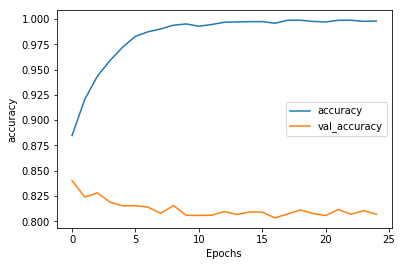

In [17]:
plot_graphs(history, 'accuracy')

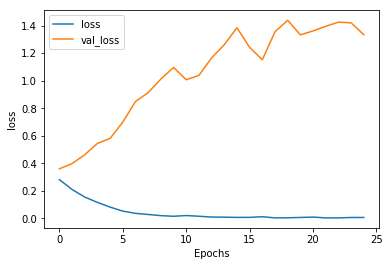

In [18]:
plot_graphs(history, 'loss')

In [20]:
## Model Definition with LSTM

model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_LSTM.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [21]:
## Model Definition with Conv1D

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_conv.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________
